In [2]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=995a8465a501f0d4dcbdfbd930f5bdae83ef7071fb5ba550ce5056194e9a5a96
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [18]:
!pip install minisom


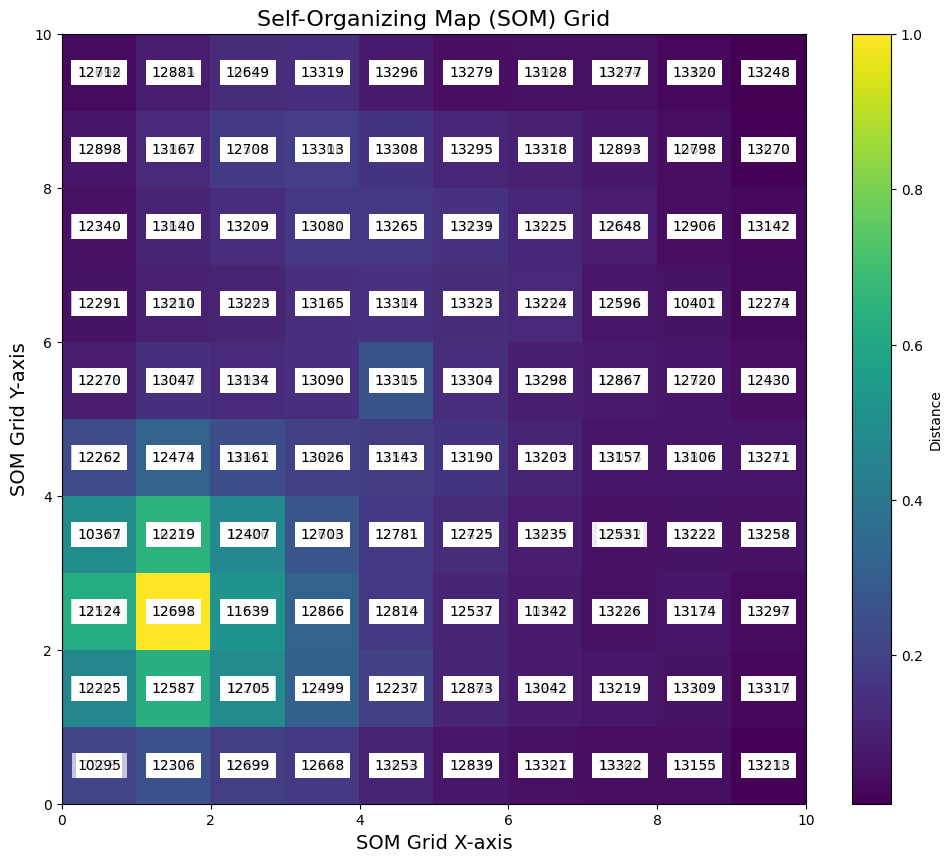

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/book_details.csv'  # The correct file path
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 2: Specify the numerical columns to clean and convert
numerical_columns = ['rating', 'no_of_ratings', 'no_of_reviews']

# Step 3: Clean and convert numerical columns to float
# Remove commas and special characters, then convert to float
data[numerical_columns] = data[numerical_columns].replace({',': '', '\xa0': ''}, regex=True)

# Convert the columns to numeric type (float)
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Step 4: Handle missing values (drop rows with NaNs in numerical columns)
data_numeric = data[numerical_columns].dropna()

# Step 5: Normalize the data using MinMaxScaler (values between 0 and 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Step 6: Set a random seed for reproducibility
np.random.seed(42)

# Step 7: Define and train the SOM
som_grid_rows, som_grid_cols = 10, 10  # Define SOM grid size
som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize random weights with a seed
som.random_weights_init(data_scaled)

# Train the SOM (1000 iterations) with random seed control
som.train_random(data_scaled, 1000)

# Step 8: Visualize the SOM grid
plt.figure(figsize=(12, 10))

# Plot the SOM distance map
plt.pcolor(som.distance_map().T, cmap='viridis')  # Use 'viridis' for a better color map
plt.colorbar(label='Distance')  # Add a color bar with label

# Mark each data point on the grid
for i, x in enumerate(data_scaled):
    winner = som.winner(x)  # Find the winning node for each data point
    plt.text(winner[0] + 0.5, winner[1] + 0.5, str(i), color='black', fontsize=10,
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Add titles and labels
plt.title('Self-Organizing Map (SOM) Grid', fontsize=16)
plt.xlabel('SOM Grid X-axis', fontsize=14)
plt.ylabel('SOM Grid Y-axis', fontsize=14)

# Set x and y limits for better aesthetics
plt.xlim(0, som_grid_rows)
plt.ylim(0, som_grid_cols)

plt.grid(False)  # Optionally remove grid lines for clarity
plt.show()
